# <font color='green'> DSCI 100 - GROUP 85: GROUP PROJECT PROPOSAL </font>
## <font color='green'> CREDIT DEFAULT CLASSIFICATION </font>

### <font color='navy'> I. Introduction </font>

This past year, Canada’s inflation rate reached a 30-year high of 5.7% (Evans, 2022). In turn, the increase in cost of living has caused 6.4% increase in credit balances (Senett, 2022). Without a comparable increase in wages, Canadians are at a greater risk of credit card default. Credit default occurs when an individual misses the minimum payment due for six months (Bucci, 2022). Credit default has vast ramifications including weak credit scores and lawsuits.

By exploring precursors to credit default, individuals become equipped to identify warning signs. The following question arises: **will an individual default on their credit payment?**

The “Default of Credit Card Clients” dataset from the UC Irvine Machine Learning Repository allows us to answer this question. It provides data on an individual’s age, sex, highest level of education obtained, marital status, amount of given credit (NTD), history of past payments, bill statement amounts (NTD), monthly payment amounts (NTD), and most importantly, whether this individual had defaulted. 

<img align="left" src="https://media.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif" width = "400"/>

Source: https://media.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif

### <font color='navy'> II. Preliminary Exploratory Data Analysis </font>

#### <font color='fushsia'> Read the Dataset

We first start by loading library packages:

In [1]:
install.packages("readxl")

library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(cowplot)
library(readxl)

options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

At first glance, the original dataset with 30,000 rows and 25 columns appears as below:

In [2]:
url1 <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
# GET(url1, write_disk(tempframe <- tempfile(fileext = ".xls")))

# credit_data <- read_excel(tempframe, 1L) 
# str(credit_data)
# head(credit_data)
# tail(credit_data)

download.file(url1, destfile = "credit_default.xls")
credit_data <- read_excel("credit_default.xls", skip = 1)
credit_data 



# credit_data <- read_csv('data/default of credit card clients.csv', skip=1)
# credit_data

#### <font color='fushsia'> Clean and Wrangle the Data </font>

While the data is already data, there are still improvements to be made.

+ First, to provide viewers with a better understanding of the data, we renamed the columns to demonstrate which months they represent
+ In addition, we changed the data type of the DEFAULT column from double to factor, as this is our target variable
+ To enable faster running times without significantly sacrificing model accuracy, we select a sample of 15,000 rows for analysis
+ Finally, to prepare for our predictive model, we split the data into training and testing sets

The table below shows our training data set, with 11,249 rows and 25 columns:

In [3]:
set.seed(1)

#TIDY THE DATA

tidy_credit_data <- credit_data |>
rename(BILL_SEPT = BILL_AMT1,
       BILL_AUG = BILL_AMT2,
       BILL_JUL = BILL_AMT3,
       BILL_JUN = BILL_AMT4,
       BILL_MAY = BILL_AMT5,
       BILL_APR = BILL_AMT6,
       PAY_SEPT = PAY_AMT1,
       PAY_AUG = PAY_AMT2,
       PAY_JUL = PAY_AMT3,
       PAY_JUN = PAY_AMT4,
       PAY_MAY = PAY_AMT5,
       PAY_APR = PAY_AMT6,
       DEFAULT = "default payment next month") |>

mutate(DEFAULT= as_factor(DEFAULT)) |>
slice_sample(n = 15000) 

#SPLIT DATA INTO TRAINING AND TESTING

credit_split <- initial_split(tidy_credit_data,
                              prop = 0.75, 
                              strata = DEFAULT)
credit_train <- training(credit_split)
credit_test <- testing (credit_split)

credit_train

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17401,200000,2,1,1,49,-1,-1,-1,-1,⋯,950,0,1900,950,950,950,0,1900,950,0
24388,320000,1,1,1,40,-1,-1,-1,-1,⋯,8240,15273,16106,8240,8240,8240,15273,16106,9690,0
13218,320000,2,1,1,42,1,2,2,0,⋯,252323,253557,256525,10000,450,7025,7161,8000,6883,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10831,10000,1,2,2,22,2,0,0,-1,⋯,528,0,0,1238,1275,528,0,0,0,1
25859,140000,2,2,1,37,-1,-1,-1,-1,⋯,1516,326,1439,326,326,1516,326,1439,326,1
14693,170000,1,2,1,34,1,2,2,2,⋯,64363,55912,54500,3400,0,3957,0,2200,1300,1


#### <font color='fushsia'> Summary Statistics </font>

Looking at the target variable summary table, we see that 
+ 78% of credit card clients pay their bills, hence non-default (DEFAULT = 0)
+ 22% of clients default on their credit cards (DEFAULT = 1)
+ There are no missing values in the training data

In [4]:
#SUMMARIZE DEFAULT/NON DEFAULT 

num_obs <- nrow(credit_train)
credit_train |>
group_by(DEFAULT) |>
summarize(count = n(), percentage = n() / num_obs * 100)

#CHECK FOR NA VALUES

missing_values <- data.frame(Number_of_Missing_Values = sum(is.na(credit_train)))
missing_values


DEFAULT,count,percentage
<fct>,<int>,<dbl>
0,8740,77.6958
1,2509,22.3042


Number_of_Missing_Values
<int>
0


To determine the average bill statement amount and the average payment amount each month: 

In [5]:
#SUMMARIZE BILL AND PAYMENT 

average_summarize <- credit_train |>
select(BILL_SEPT:PAY_APR) |>
map_df(mean, na.rm=TRUE) 

average_summarize_bill <- average_summarize |>
pivot_longer(cols = BILL_SEPT:BILL_APR,
             names_to = "Month",
             values_to = "Mean_Amount") |>
select(Month:Mean_Amount)
average_summarize_bill

average_summarize_pay <- average_summarize |>
pivot_longer(cols = PAY_SEPT:PAY_APR,
             names_to = "Month",
             values_to = "Mean_Amount") |>
select(Month:Mean_Amount)
average_summarize_pay

Month,Mean_Amount
<chr>,<dbl>
BILL_SEPT,52078.22
BILL_AUG,50029.63
BILL_JUL,48032.24
BILL_JUN,44312.64
BILL_MAY,41349.74
BILL_APR,39731.71


Month,Mean_Amount
<chr>,<dbl>
PAY_SEPT,5788.625
PAY_AUG,5940.109
PAY_JUL,5254.558
PAY_JUN,4861.044
PAY_MAY,4661.477
PAY_APR,5126.886


#### <font color='fushsia'> Visualization </font>

To illustrate the distribution of Default and Non Default Credit, we created several scatter plots with an x-axis of monthly bill statements, a y-axis of monthly payment amounts, and a colour mapping to Default (1) or Non-Default (0).

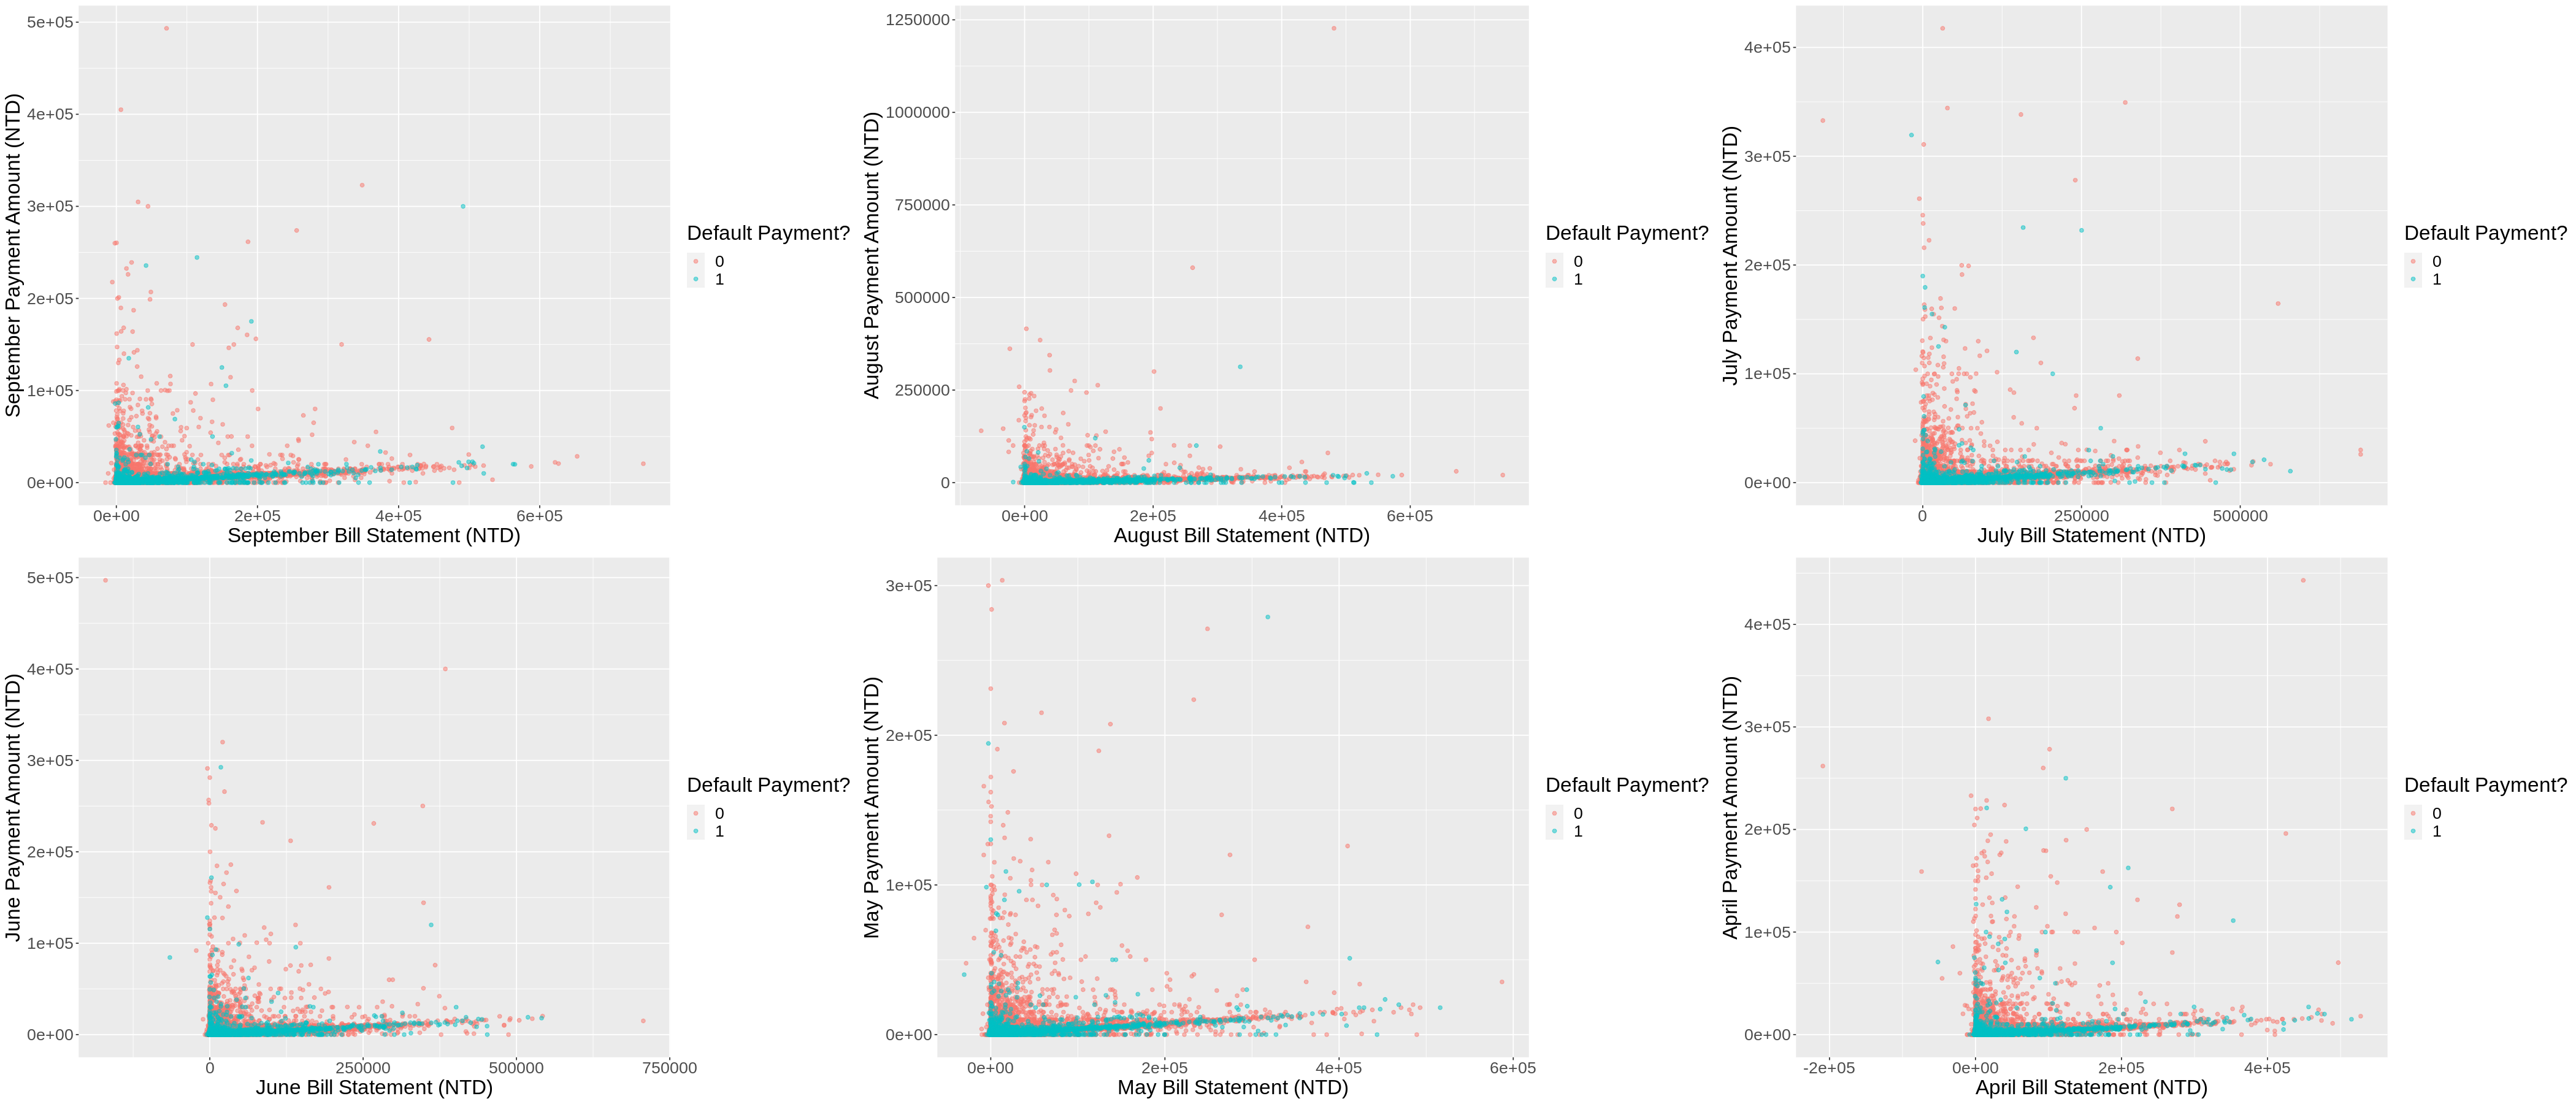

In [6]:
#VISUALIZATION

options(repr.plot.width = 35, repr.plot.height = 15)

sept_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "September Bill Statement (NTD)", 
     y = "September Payment Amount (NTD)", 
     color = "Default Payment?") +
theme(text = element_text(size = 20))

aug_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_AUG, y = PAY_AUG, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "August Bill Statement (NTD)", 
     y = "August Payment Amount (NTD)", 
     color = "Default Payment?") +
theme(text = element_text(size = 20))

jul_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_JUL, y = PAY_JUL, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "July Bill Statement (NTD)", 
     y = "July Payment Amount (NTD)", 
     color = "Default Payment?") +
theme(text = element_text(size = 20))

jun_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_JUN, y = PAY_JUN, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "June Bill Statement (NTD)", 
     y = "June Payment Amount (NTD)", 
     color = "Default Payment?") +
theme(text = element_text(size = 20))

may_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_MAY, y = PAY_MAY, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "May Bill Statement (NTD)", 
     y = "May Payment Amount (NTD)", 
     color = "Default Payment?") +
theme(text = element_text(size = 20))

apr_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_APR, y = PAY_APR, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "April Bill Statement (NTD)", 
     y = "April Payment Amount (NTD)", 
     color = "Default Payment?") +
theme(text = element_text(size = 20))

plot_grid(sept_bill_vs_payment, aug_bill_vs_payment,
          jul_bill_vs_payment, jun_bill_vs_payment,
          may_bill_vs_payment, apr_bill_vs_payment,
          label_size = 12)

### <font color='navy'> III. Method </font>

We will conduct our analysis using the K-nearest neighbours algorithm. Specifically, we will perform a binary classification on the “Default of Credit Card Clients” dataset. The dataset tracks the credit history of individuals from April 2005 to September 2005. As each month passes without a payment made, it becomes more difficult to catch-up. Therefore, we will analyze data from the latter half of the six-month period as it better disregards singular, outlying missed payments. This assumption allows us to answer our question without compromising accuracy or R’s data-processing capacity. 

As the `BILL_*` columns detail the monthly bill statement amount and the `PAY_*` columns report monthly payment amounts, these variables are significant. The two variables allow us to determine the amount of debt the individual has amassed. Hence, we plan to use the columns `BILL_JUN`, `BILL_JUL`, `BILL_AUG`, `PAY_JUL`, `PAY_AUG`, and `PAY_SEPT` as our predictor variables.

To visualize the data, we plan to create a scatter plot of each month's bill payment against each month's payment amount and use colour to differentiate whether the individual had defaulted. 

### <font color='navy'> IV. Expected Outcomes and Significance </font>

From the above plot, it appears that credit defaulting occurs more often when clients make low payment amounts and when the bill statement amount is less than $25,000 NTD. These trends appears across all six months of data. As such, we expect that the model will classify data as 1 (credit default) when monthly payment amounts and bill statment amounts are low.

These findings can help both credit card clients and financial institutions identify warning signs to credit default. In turn, this allows individuals to plan ahead and assists financial institutions in risk assessment. An accurate prediction can help in balancing risk and return for the banks; charging higher rates for higher risks, or even denying new credits when required.

This project explores just one of many aspects of credit default, thereby leading to the future questions of:
- How do categorical variables of sex, education, and marital status affect whether an individual defaults?
- How do bill statement and monthly payment amounts affect an individual when applying for new credit cards?

### <font color='navy'> References

Bucci, S. (2022, April 26). Credit card default: What to do about it. Bankrate. Retrieved October 25, 2022, from https://www.bankrate.com/finance/credit-cards/credit-card-default/ 

Evans, P. (2022, March 16). Canada's inflation rate now at 30-year high of 5.7%. CBCnews. Retrieved October 25, 2022, from https://www.cbc.ca/news/business/canada-inflation-february-1.6386536 

Senett, K. (2022, September 23). How much credit card debt does the average Canadian have? MoneySense. Retrieved October 25, 2022, from https://www.moneysense.ca/save/debt/how-much-credit-card-debt-does-the-average-canadian-have/ 

Wilke, C. O. (2020, December 15). Introduction to cowplot. R/CRAN. Retrieved October 25, 2022, from https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html

Yeh, I.-C. (2009). Default of Credit Card Clients Data Set. UCI Machine Learning Repository. Retrieved October 25, 2022, from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 